**Alan Jesús Cortés de la Torre**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
semilla = 5
X,Y = make_blobs(n_samples=1500,random_state=semilla)

In [5]:
Y.shape

(1500,)

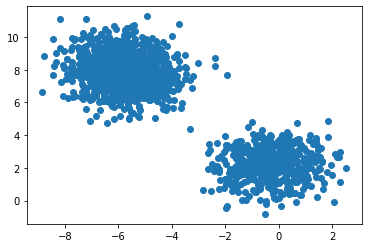

In [28]:
plt.scatter(X[:,0],X[:,1])
plt.show()

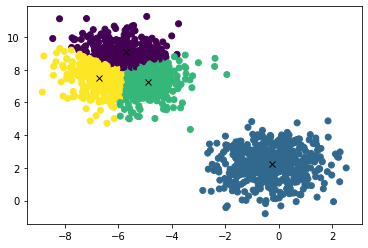

In [31]:
model = KMeans(n_clusters=4,random_state=semilla,init="k-means++")
model = model.fit(X)
grupos = model.predict(X)

centroides = model.cluster_centers_

plt.scatter(X[:,0],X[:,1],c=grupos)
plt.plot(centroides[:,0],centroides[:,1],"x",color="black")
plt.show()

## Criterios de selección

In [89]:
inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters=k,random_state=semilla,init="random")
    model = model.fit(X)
    inercias[k] = model.inertia_

In [34]:
inercias = [KMeans(n_clusters=k,random_state=semilla,init="random").fit(X).inertia_ for k in np.arange(1, 15)]

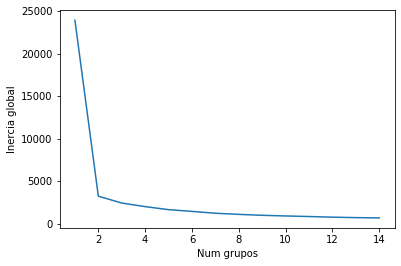

In [41]:
plt.plot(np.arange(1,15),inercias)
plt.xlabel("Num grupos")
plt.ylabel("Inercia global")
plt.show()

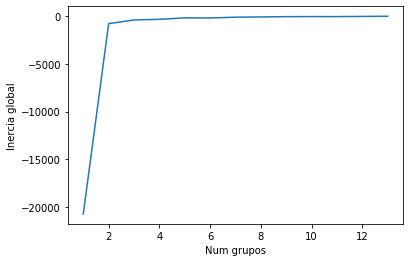

In [44]:
plt.plot(np.arange(1,14),np.diff(inercias))
plt.xlabel("Num grupos")
plt.ylabel("Inercia global")
plt.show()

## Clasificamos películas

In [92]:
import pandas as pd

In [93]:
data=pd.read_csv("pelis_kmeans.csv")
data = data.drop('Unnamed: 0',axis=1)
data = data.set_index("Nombre")
data.head()

,Inteligencia Artificial,Super Man,E.T.,Interestelar,Mr. Nobody,Star Wars,V de Vendeta,Avatar,Contacto,El Origen (Inception),...,El señor de los anillos,Harry Potter,Blanca Nieves,Big fish,Narnia,El laberinto del fauno,The shape of water,Aquaman,El lobo de wall street,Una serie de eventos desafortunados
Nombre,,,,,,,,,,,,,,,,,,,,,
ALEJANDRO RAMOS GUTIERREZ,1.0,5.0,5.0,5.0,5.0,5.0,2.0,4.0,1.0,5.0,...,2.0,5.0,3.0,1.0,5,3.0,1.0,1.0,5.0,1.0
OSCAR EDUARDO FLORES HERNANDEZ,1.0,3.0,3.0,1.0,1.0,3.0,5.0,5.0,1.0,5.0,...,4.0,3.0,3.0,1.0,3,1.0,4.0,1.0,5.0,1.0
LIZBETH ALEJANDRA BARRAGAN VAZQUEZ,1.0,2.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,2.0,1.0,4.0,3.0,1,5.0,4.0,1.0,2.0,1.0
EDZNA FRANCO JARAMILLO,4.0,3.0,5.0,4.0,1.0,4.0,1.0,5.0,3.0,1.0,...,2.0,5.0,5.0,1.0,4,3.0,1.0,5.0,5.0,3.0
JESUS MANUEL SALOMON CALDERON,1.0,4.0,3.0,1.0,1.0,5.0,1.0,3.0,1.0,1.0,...,2.0,2.0,3.0,1.0,4,1.0,1.0,1.0,5.0,1.0


In [94]:
X = data.values
X

array([[1., 5., 5., ..., 1., 5., 1.],
       [1., 3., 3., ..., 1., 5., 1.],
       [1., 2., 1., ..., 1., 2., 1.],
       ...,
       [0., 0., 4., ..., 0., 4., 4.],
       [1., 5., 5., ..., 1., 5., 5.],
       [0., 3., 5., ..., 4., 4., 0.]])

In [102]:
model = KMeans(n_clusters=3,random_state=semilla,init="k-means++")
model = model.fit(X)
grupos = model.predict(X)

centroides = model.cluster_centers_
grupos

array([2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 1])

In [100]:
for i in range(3):
    for j in np.where(grupos==i)[0]:
        print(data.index[j]," grupo : ",i+1)
    print("\n")

HERSON GIOVANNI ORONIA CERVANTES  grupo :  1
MARCOS ORTIZ-TIRADO MIRANDA  grupo :  1
LUIS ENRIQUE SANCHEZ RUIZ  grupo :  1
PALOMA MARTINEZ GONZALEZ  grupo :  1
KITZIA SARAHI FIGUEROA MONROY  grupo :  1
DIEGO PINTOR OCHOA  grupo :  1
EVELIN GUADALUPE CASTRO DAMIAN  grupo :  1
GONZALO ARTEMIO RAMIREZ ROJAS  grupo :  1
RODRIGO FERNANDEZ DE LEON SILVA  grupo :  1
ANDRES RUBIO VILLASEÑOR  grupo :  1
OSCAR MIGUEL PEREZ ISLAS  grupo :  1
BERNARDO RAMIREZ GONZALEZ  grupo :  1
ARTURO ESPINOSA CARABEZ  grupo :  1
PABLO ADAN GARCIA TERUEL VIZCAINO  grupo :  1
REYNALDO GODINEZ GRACIAN  grupo :  1
PAULO SANTIAGO PEREZ SABORIO  grupo :  1
JOSE PABLO VAZQUEZ TELLO  grupo :  1
RODOLFO SLAY RAMOS  grupo :  1
JOSE FERNANDO FLORES GARCIA  grupo :  1
GUILLERMO CAMPOLLO RAMIREZ  grupo :  1
ERICK SALAZAR HERNANDEZ  grupo :  1
GADDIEL DESIRENA LOPEZ  grupo :  1
BETSY LETICIA TORRES LOPEZ  grupo :  1
PATRICIA BUENROSTRO MENDEZ  grupo :  1
SANTIAGO BARBA GALVAN  grupo :  1
DIEGO ALEJANDRO OROZCO PADILLA  grupo

In [97]:
inercias = np.zeros(20)
for k in np.arange(1,20):
    model = KMeans(n_clusters=k,random_state=semilla,init="random")
    model = model.fit(X)
    inercias[k] = model.inertia_

## Criterio del codo 

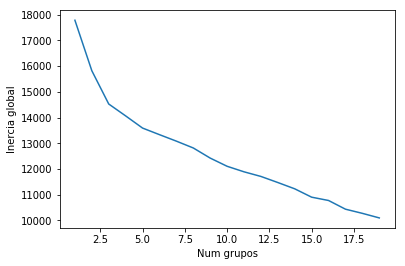

In [104]:
plt.plot(np.arange(1,20),inercias[1:])
plt.xlabel("Num grupos")
plt.ylabel("Inercia global")
plt.show()

## Criterio del Gradiente

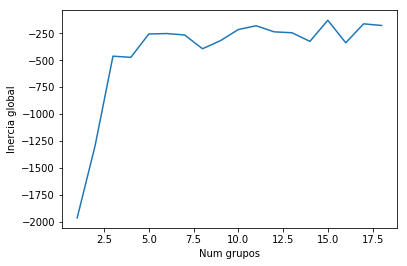

In [98]:
plt.plot(np.arange(1,19),np.diff(inercias[1:]))
plt.xlabel("Num grupos")
plt.ylabel("Inercia global")
plt.show()